<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_8709/669751617.py:17: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("/home/user/Downloads/\dataset/Personal_Finance_Dataset.csv")


Dataset Loaded!

         Date                   Transaction Description      Category  \
0  2020-01-02                               Score each.  Food & Drink   
1  2020-01-02                       Quality throughout.     Utilities   
2  2020-01-04        Instead ahead despite measure ago.          Rent   
3  2020-01-05  Information last everything thank serve.    Investment   
4  2020-01-13              Future choice whatever from.  Food & Drink   

    Amount     Type  
0  1485.69  Expense  
1  1475.58  Expense  
2  1185.08  Expense  
3  2291.00   Income  
4  1126.88  Expense  

Cleaned Data Sample:
         Date                   Transaction Description      Category   Amount  \
0 2020-01-02                               Score each.  Food & Drink  1485.69   
1 2020-01-02                       Quality throughout.     Utilities  1475.58   
2 2020-01-04        Instead ahead despite measure ago.          Rent  1185.08   
3 2020-01-05  Information last everything thank serve.    Investm

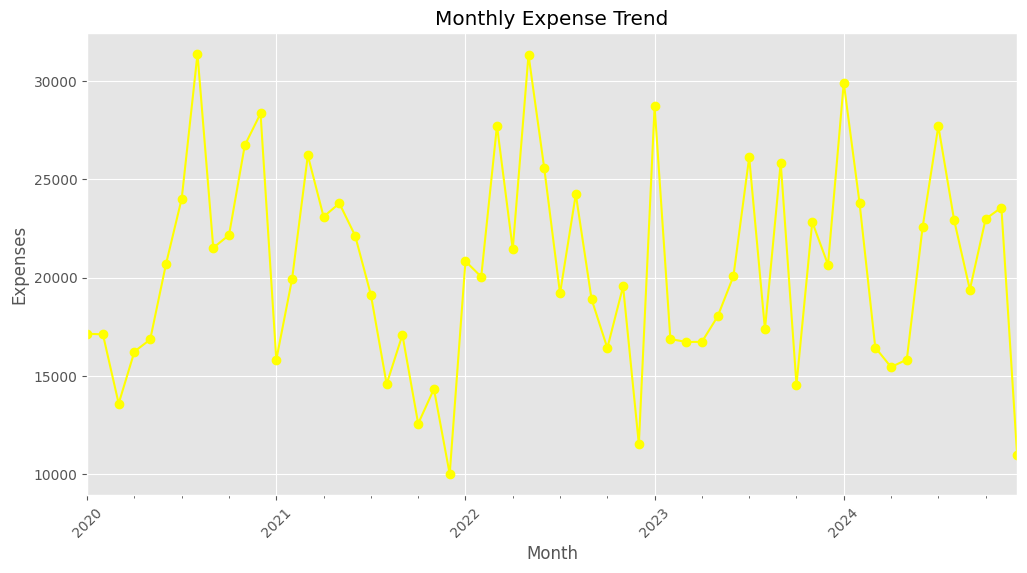

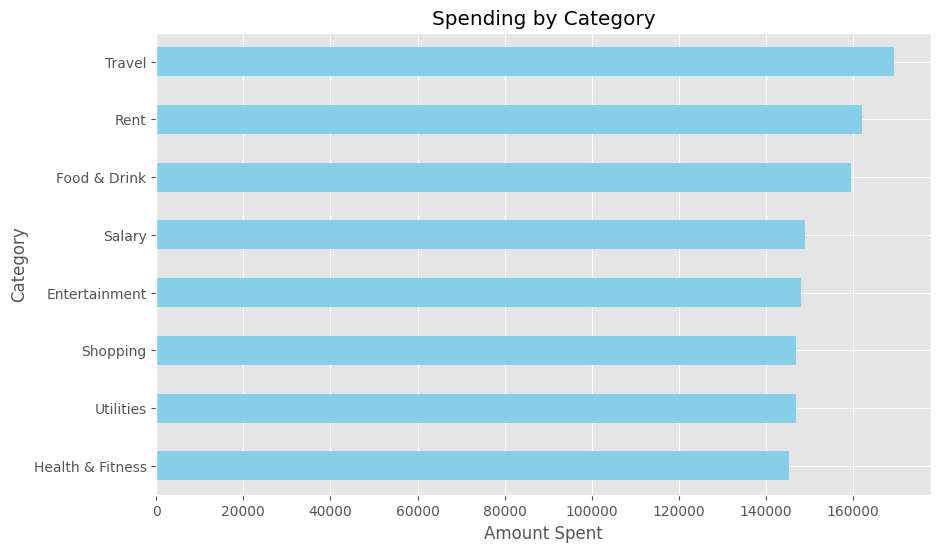


Top 10 Highest Expenses:
           Date           Transaction Description          Category   Amount
173  2020-08-22                       Down occur.      Food & Drink  1999.82
243  2020-11-12        Order his oil west school.      Food & Drink  1999.15
354  2021-03-19                   Across nothing.      Food & Drink  1997.19
586  2022-01-21  Enter example down anyone occur.  Health & Fitness  1996.26
287  2020-12-28                    Song risk bad.            Travel  1994.88
1250 2024-02-24       Cup red collection husband.            Salary  1993.30
656  2022-04-05             Marriage participant.         Utilities  1985.77
1113 2023-09-16     Quite everyone as generation.         Utilities  1984.77
426  2021-06-06     Wait it quickly produce beat.            Salary  1982.06
720  2022-06-18                        Day stock.     Entertainment  1980.56


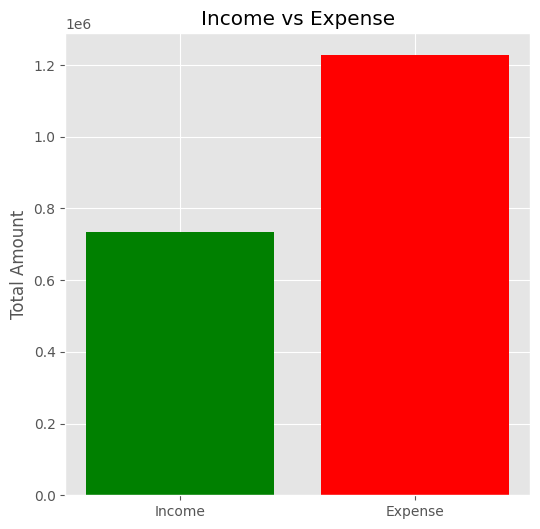

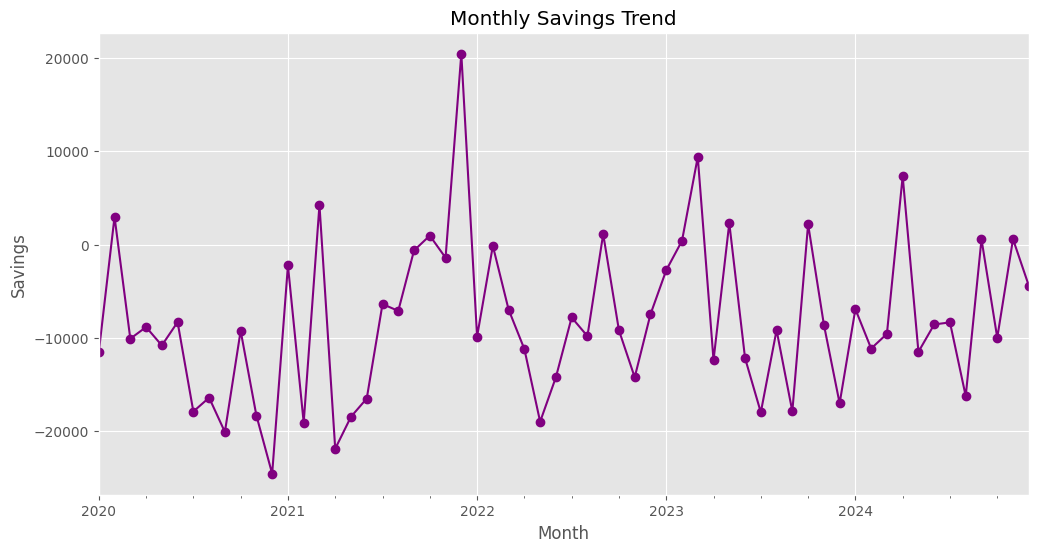


------------------------------------------------------
          PERSONAL FINANCE SUMMARY
------------------------------------------------------
Total Income  : ₹734,087.00
Total Expense : ₹1,227,194.37
Total Savings : ₹-493,107.37

Top Spending Categories:
Category
Travel           169497.79
Rent             162075.39
Food & Drink     159493.39
Salary           149053.55
Entertainment    148165.47
Name: Amount, dtype: float64

Monthly Savings Summary:
Period
2020-01   -11560.25
2020-02     2961.59
2020-03   -10116.81
2020-04    -8863.05
2020-05   -10838.13
2020-06    -8334.72
2020-07   -17934.27
2020-08   -16445.80
2020-09   -20130.15
2020-10    -9265.99
2020-11   -18366.16
2020-12   -24613.12
2021-01    -2253.11
2021-02   -19121.23
2021-03     4242.76
2021-04   -21929.71
2021-05   -18497.78
2021-06   -16538.63
2021-07    -6396.37
2021-08    -7129.03
2021-09     -639.76
2021-10      951.43
2021-11    -1420.37
2021-12    20485.34
2022-01    -9886.61
2022-02     -143.69
2022-03    -698

In [6]:
#personal_finance_Analysis

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
pd.set_option("display.max_columns", None)

# -------------------------------------------------------
# 1. LOAD DATA
# -------------------------------------------------------

df = pd.read_csv("/home/user/Downloads/\dataset/Personal_Finance_Dataset.csv")
print("Dataset Loaded!\n")
print(df.head())

# -------------------------------------------------------
# 2. CLEAN DATA
# -------------------------------------------------------

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Remove rows where date is invalid
df = df.dropna(subset=["Date"])

# Remove negative or zero amounts
df = df[df["Amount"] > 0]

# Standardize text fields
df["Category"] = df["Category"].str.strip()
df["Transaction Description"] = df["Transaction Description"].str.strip()

# Create useful columns
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month_name()
df["Month_Number"] = df["Date"].dt.month

print("\nCleaned Data Sample:\n", df.head())

# -------------------------------------------------------
# 3. MONTHLY EXPENSE TREND
# -------------------------------------------------------

monthly_expense = df[df["Type"]=="Expense"].groupby(df["Date"].dt.to_period("M"))["Amount"].sum()

plt.figure(figsize=(12,6))
monthly_expense.plot(marker="o", color="yellow")
plt.title("Monthly Expense Trend")
plt.xlabel("Month")
plt.ylabel("Expenses")
plt.xticks(rotation=45)
plt.show()

# -------------------------------------------------------
# 4. CATEGORY-WISE SPENDING
# -------------------------------------------------------

cat_expense = df[df["Type"]=="Expense"].groupby("Category")["Amount"].sum().sort_values()

plt.figure(figsize=(10,6))
cat_expense.plot(kind="barh", color="skyblue")
plt.title("Spending by Category")
plt.xlabel("Amount Spent")
plt.ylabel("Category")
plt.show()

# -------------------------------------------------------
# 5. TOP 10 EXPENSES
# -------------------------------------------------------

top_exp = df[df["Type"]=="Expense"].nlargest(10, "Amount")

print("\nTop 10 Highest Expenses:")
print(top_exp[["Date", "Transaction Description", "Category", "Amount"]])

# -------------------------------------------------------
# 6. INCOME VS EXPENSE
# -------------------------------------------------------

income_sum = df[df["Type"]=="Income"]["Amount"].sum()
expense_sum = df[df["Type"]=="Expense"]["Amount"].sum()

plt.figure(figsize=(6,6))
plt.bar(["Income", "Expense"], [income_sum, expense_sum], color=["green","red"])
plt.title("Income vs Expense")
plt.ylabel("Total Amount")
plt.show()

# -------------------------------------------------------
# 7. MONTHLY SAVINGS TREND
# -------------------------------------------------------

df["Period"] = df["Date"].dt.to_period("M")

income_month = df[df["Type"]=="Income"].groupby("Period")["Amount"].sum()
expense_month = df[df["Type"]=="Expense"].groupby("Period")["Amount"].sum()

savings = income_month - expense_month

plt.figure(figsize=(12,6))
savings.plot(marker="o", color="purple")
plt.title("Monthly Savings Trend")
plt.ylabel("Savings")
plt.xlabel("Month")
plt.show()

# -------------------------------------------------------
# 8. SUMMARY REPORT
# -------------------------------------------------------

print("\n------------------------------------------------------")
print("          PERSONAL FINANCE SUMMARY")
print("------------------------------------------------------")
print(f"Total Income  : ₹{income_sum:,.2f}")
print(f"Total Expense : ₹{expense_sum:,.2f}")
print(f"Total Savings : ₹{income_sum - expense_sum:,.2f}")

print("\nTop Spending Categories:")
print(cat_expense.sort_values(ascending=False).head())

print("\nMonthly Savings Summary:")
print(savings)
